In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

ncfile = '~/downloads/c1184286e03e4f4ba38d65bd5754beb2/c1184286e03e4f4ba38d65bd5754beb2/data/contents/WRF-NARR-1km-WY2017/WRF-NARR-1km-WY2017.nc'
ncfile

'~/downloads/c1184286e03e4f4ba38d65bd5754beb2/c1184286e03e4f4ba38d65bd5754beb2/data/contents/WRF-NARR-1km-WY2017/WRF-NARR-1km-WY2017.nc'

In [13]:
ds = xr.open_dataset(ncfile)
ds

<xarray.Dataset>
Dimensions:  (XTIME: 365, south_north: 327, west_east: 348)
Coordinates:
  * XTIME    (XTIME) datetime64[ns] 2016-10-01 2016-10-02 ... 2017-09-30
Dimensions without coordinates: south_north, west_east
Data variables:
    DPRCP    (XTIME, south_north, west_east) float32 ...
    TMEAN    (XTIME, south_north, west_east) float32 ...
    Q2       (XTIME, south_north, west_east) float32 ...
    SWDOWN   (XTIME, south_north, west_east) float32 ...
    SWNORM   (XTIME, south_north, west_east) float32 ...
    TMIN     (XTIME) float32 ...
    TMAX     (XTIME) float32 ...

In [17]:
da_seasonal_prcp = ds['DPRCP'].groupby('XTIME.month').sum(dim='XTIME')
da_seasonal_prcp

<xarray.DataArray 'DPRCP' (month: 12, south_north: 327, west_east: 348)>
array([[[  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,  31.36789  ,  30.886375 , ...,  92.88166  ,
          91.878174 ,   0.       ],
        [  0.       ,  30.955116 ,  30.530823 , ...,  91.60909  ,
          90.69567  ,   0.       ],
        ...,
        [  0.       ,  42.995934 ,  43.87714  , ...,  30.51477  ,
          30.030052 ,   0.       ],
        [  0.       ,  40.473183 ,  41.11078  , ...,  30.157166 ,
          29.431427 ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ]],

       [[  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,  41.262268 ,  40.98037  , ...,  94.67858  ,
          94.69528  ,   0.       ],
        [  0.       ,  40.1292   ,  40.191643 , ...,  93.42395  ,
          94.411316 ,   0.       ],
...
        [  0.       ,  32.833992 ,  32.903503 , ...,  11.535568 ,
          11.266388 ,   0.       ],
        [  0.       ,  29.179274 ,  29.872347 , ...,  11.765366 ,
          11.4978485,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ]],

       [[  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ],
        [  0.       ,  36.123253 ,  36.352283 , ...,  91.94556  ,
          92.03771  ,   0.       ],
        [  0.       ,  35.285072 ,  35.67965  , ...,  91.181366 ,
          91.348946 ,   0.       ],
        ...,
        [  0.       , 134.32745  , 132.40637  , ...,  62.101852 ,
          61.227203 ,   0.       ],
        [  0.       , 132.92989  , 130.43524  , ...,  62.389107 ,
          61.337505 ,   0.       ],
        [  0.       ,   0.       ,   0.       , ...,   0.       ,
           0.       ,   0.       ]]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: south_north, west_east

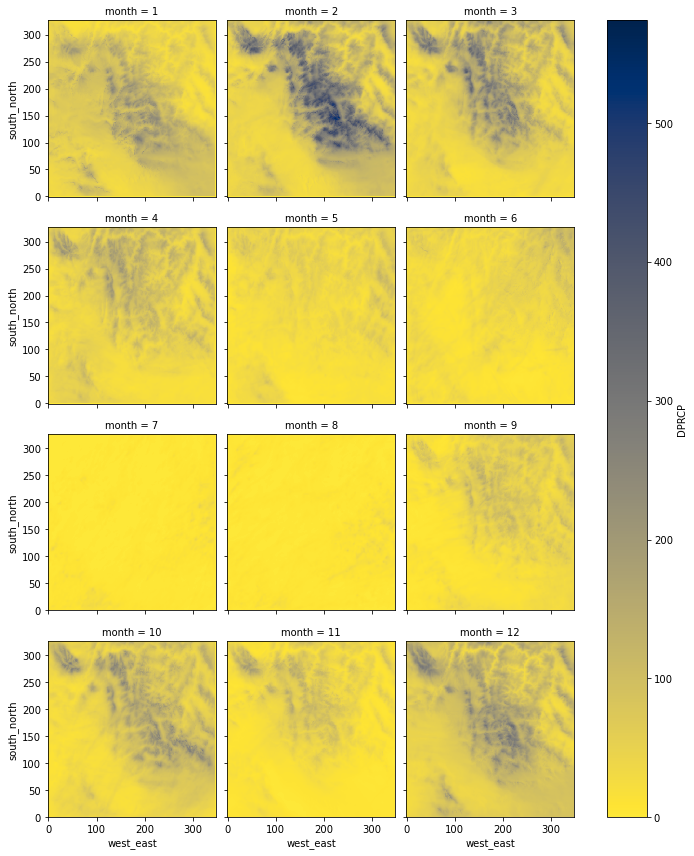

In [21]:
da_seasonal_prcp.plot(x='west_east', y='south_north', col='month', col_wrap=3, cmap='cividis_r')

In [23]:
da_seasonal_anom = da_seasonal_prcp - (ds['DPRCP'].sum(dim='XTIME') / 12)
da_seasonal_anom

<xarray.DataArray 'DPRCP' (month: 12, south_north: 327, west_east: 348)>
array([[[  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,   9.029482,   8.802132, ...,  57.58964 ,
          56.580456,   0.      ],
        [  0.      ,   8.958124,   8.725283, ...,  56.78526 ,
          55.7375  ,   0.      ],
        ...,
        [  0.      , -11.776848, -10.292679, ..., -17.745007,
         -18.18824 ,   0.      ],
        [  0.      , -12.499718, -11.401836, ..., -17.731628,
         -18.436005,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ]],

       [[  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,  18.92386 ,  18.896126, ...,  59.386562,
          59.397564,   0.      ],
        [  0.      ,  18.132208,  18.386103, ...,  58.600117,
          59.453144,   0.      ],
...
        [  0.      , -21.93879 , -21.266315, ..., -36.72421 ,
         -36.951904,   0.      ],
        [  0.      , -23.793627, -22.640268, ..., -36.12343 ,
         -36.369583,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ]],

       [[  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ],
        [  0.      ,  13.784845,  14.26804 , ...,  56.653538,
          56.739994,   0.      ],
        [  0.      ,  13.28808 ,  13.874109, ...,  56.357533,
          56.390774,   0.      ],
        ...,
        [  0.      ,  79.55467 ,  78.23656 , ...,  13.842075,
          13.008911,   0.      ],
        [  0.      ,  79.956985,  77.92262 , ...,  14.500313,
          13.470074,   0.      ],
        [  0.      ,   0.      ,   0.      , ...,   0.      ,
           0.      ,   0.      ]]], dtype=float32)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: south_north, west_east

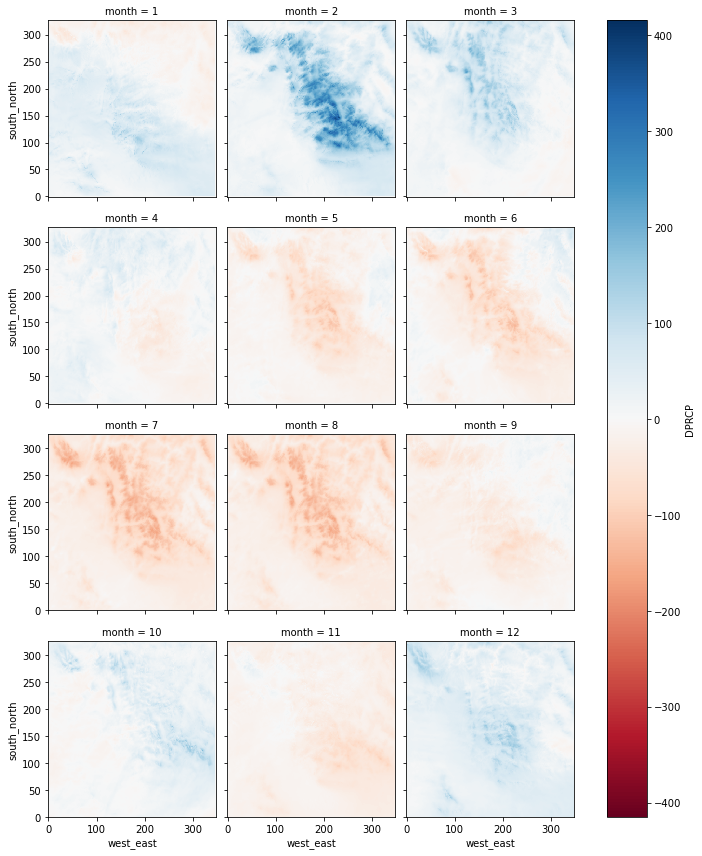

In [27]:
da_seasonal_anom.plot(x='west_east', y='south_north', col='month', col_wrap=3, cmap='RdBu')